In [1]:
#Set up required libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
import openpyxl

In [10]:
df=pd.read_excel (r'C:\Users\LAMECK OMENDA\Downloads\Junior Data Analyst _ Data.xlsx',
                              engine='openpyxl',
                              sheet_name='Raw Data',
                              skiprows=range(2))
df.head(10)

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
0,0,2020-01-01 00:00:00,0.000,1.509849
1,1,2020-01-01 01:00:00,0.000,1.411859
2,2,2020-01-01 02:00:00,0.000,1.023898
3,3,2020-01-01 03:00:00,0.000,0.642000
4,4,2020-01-01 04:00:00,0.000,0.960000
5,5,2020-01-01 05:00:00,0.012,0.897000
6,6,2020-01-01 06:00:00,0.006,0.648000
7,7,2020-01-01 07:00:00,0.009,0.774000
8,8,2020-01-01 08:00:00,0.012,1.299000
9,9,2020-01-01 09:00:00,0.846,0.606000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Hour                                8760 non-null   int64         
 1   Date/hour start                     8760 non-null   datetime64[ns]
 2   Solar electricity generation (kWh)  8760 non-null   float64       
 3   Electricity usage (kWh)             8760 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 273.9 KB


In [13]:
df.describe()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
count,8760.000000,8760,8760.000000,8760.000000
mean,11.500000,2020-07-02 07:37:13.972602624,1.116750,7.312704
min,0.000000,2020-01-01 00:00:00,0.000000,-12.624000
25%,5.750000,2020-04-02 05:45:00,0.000000,0.300000
50%,11.500000,2020-07-02 11:30:00,0.024000,0.621000
75%,17.250000,2020-10-01 17:15:00,1.272750,1.686000
max,23.000000,2020-12-31 23:00:00,13.050000,46000.000000
std,6.922582,NaN,2.026098,491.479806


In [14]:
df.isnull().sum()

Hour                                  0
Date/hour start                       0
Solar electricity generation (kWh)    0
Electricity usage (kWh)               0
dtype: int64

In [15]:
hourly_average=df.groupby('Hour')[['Solar electricity generation (kWh)', 'Electricity usage (kWh)']]

C:\Users\LAMECK OMENDA\anaconda\Lib\site-packages\pandas\plotting\_matplotlib\core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


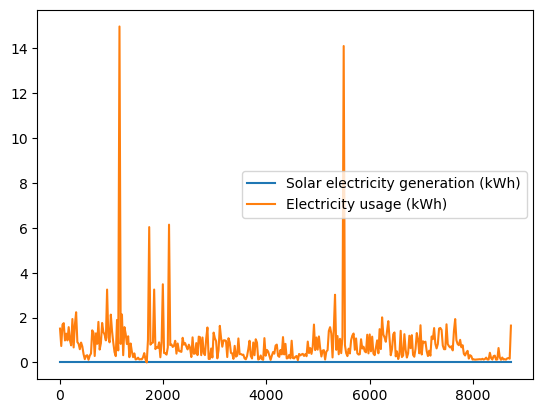

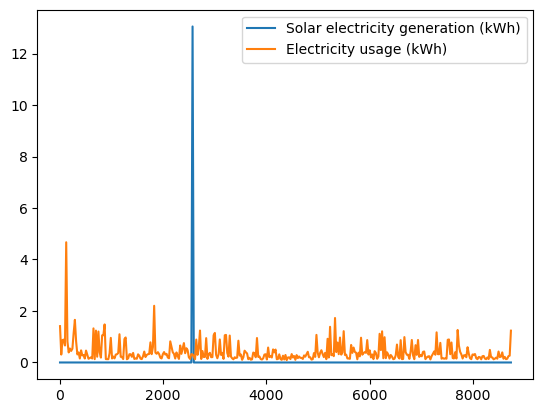

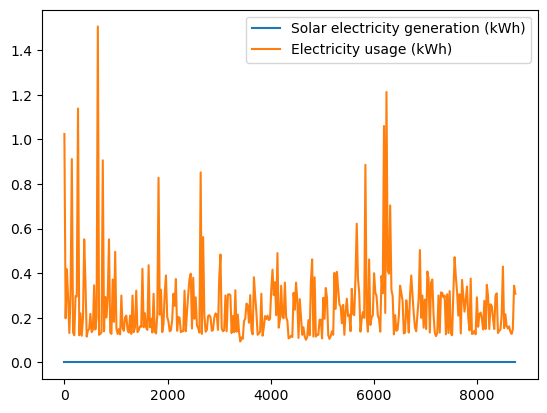

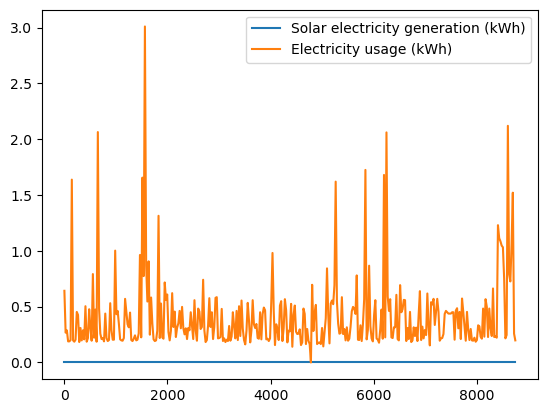

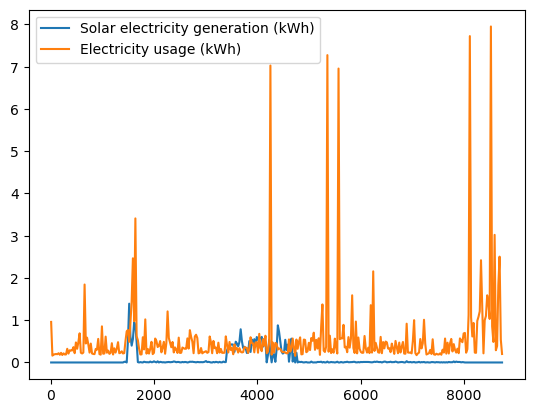

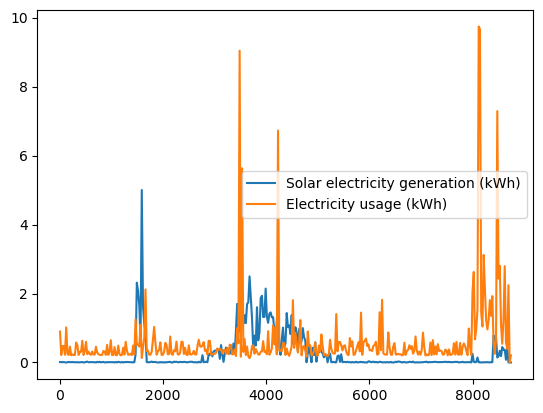

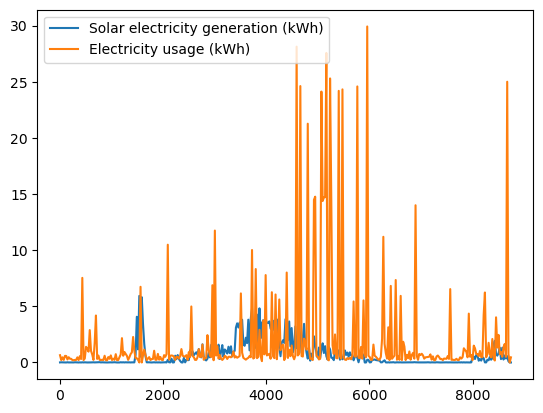

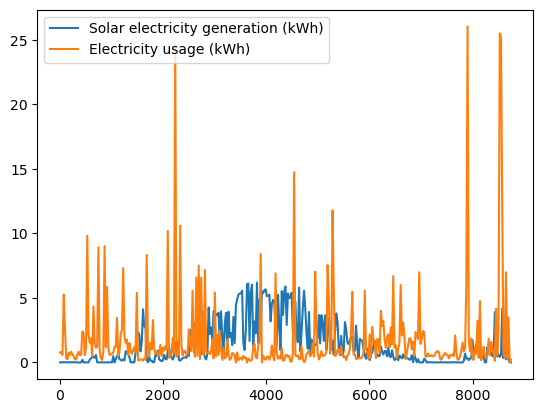

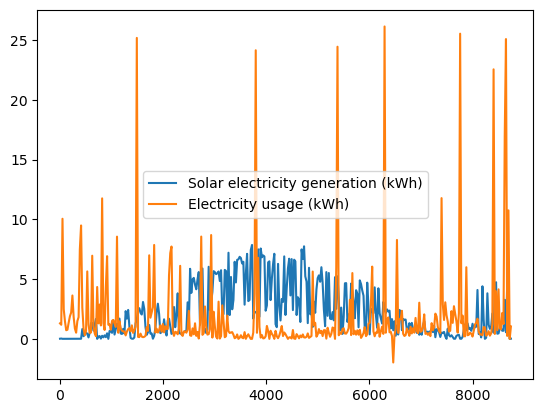

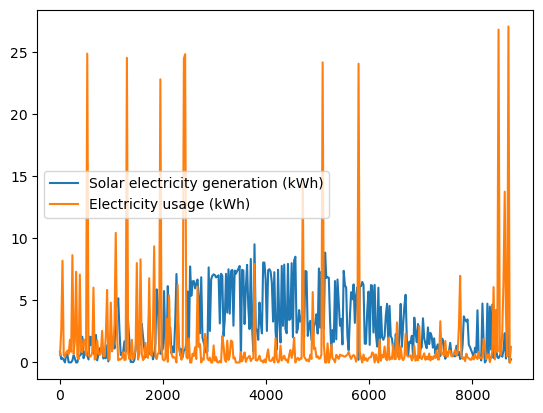

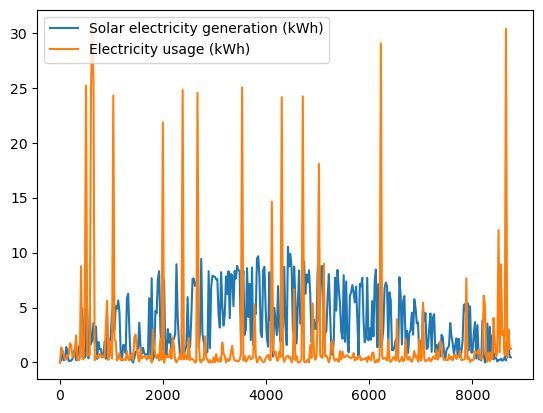

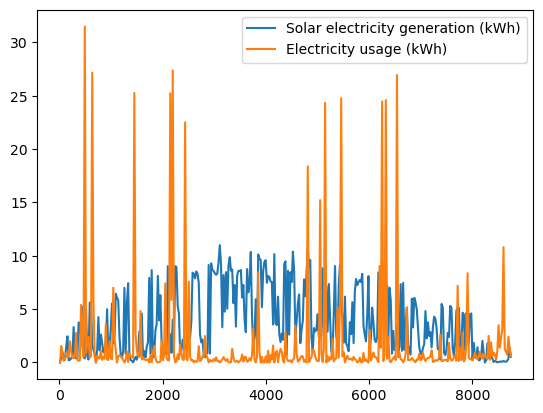

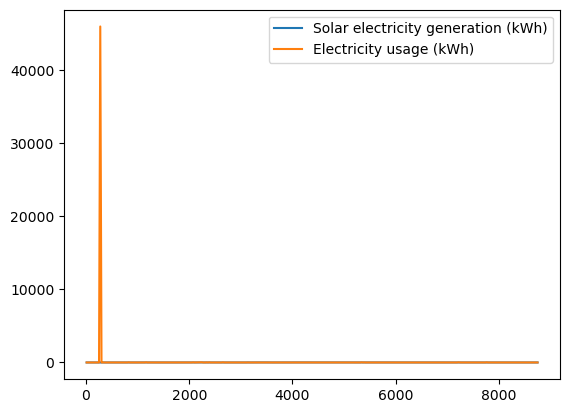

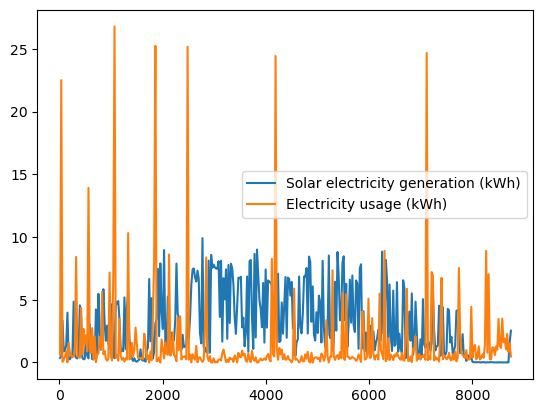

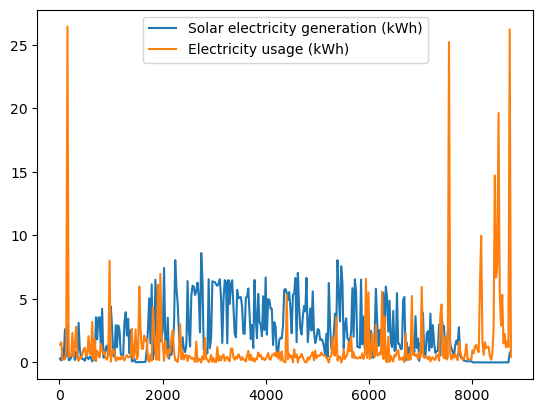

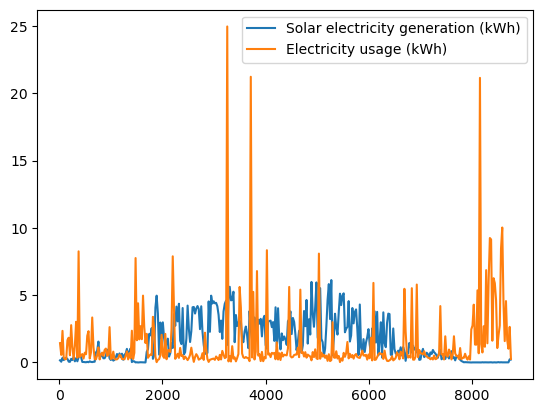

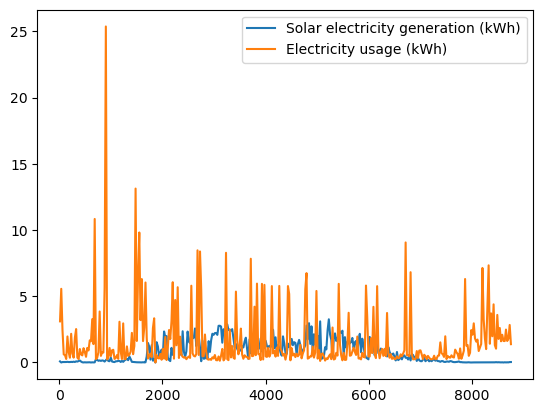

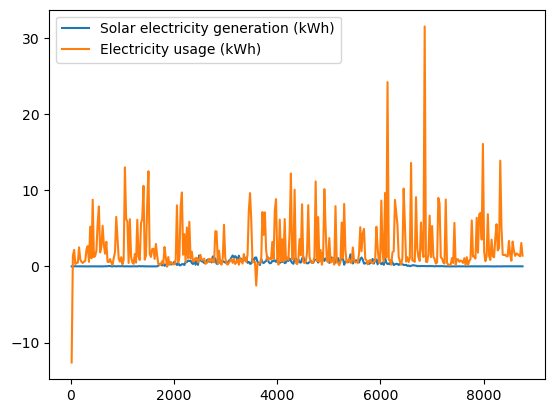

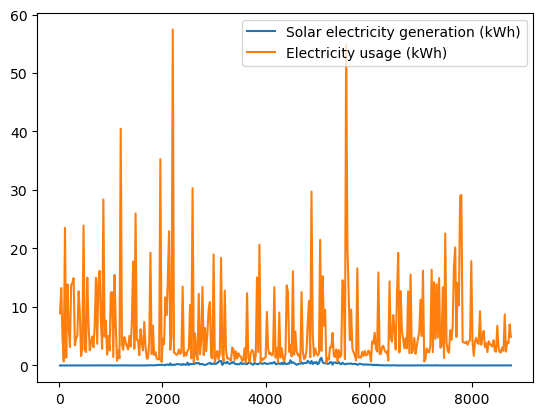

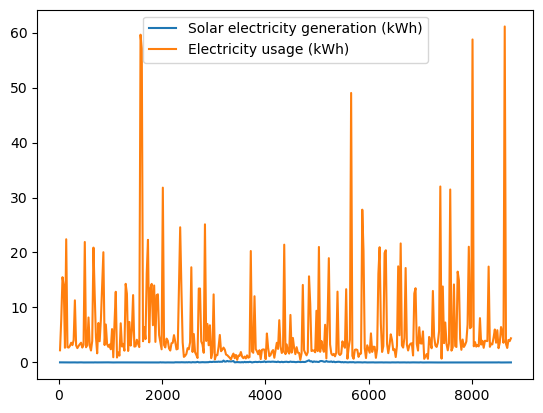

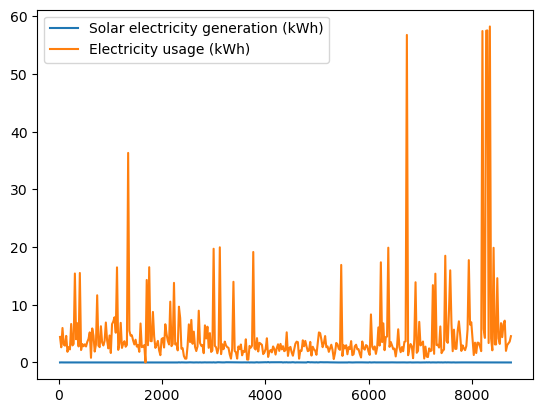

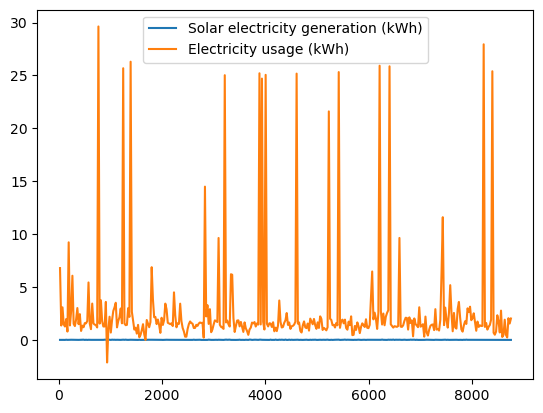

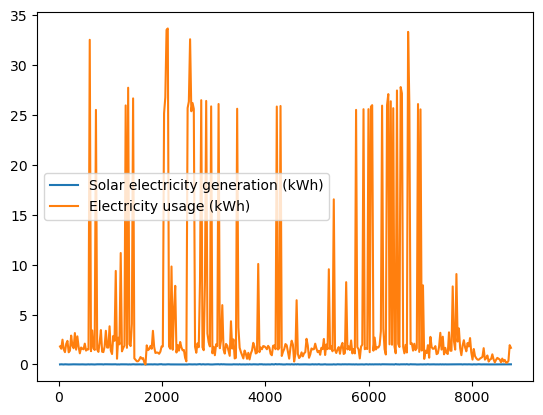

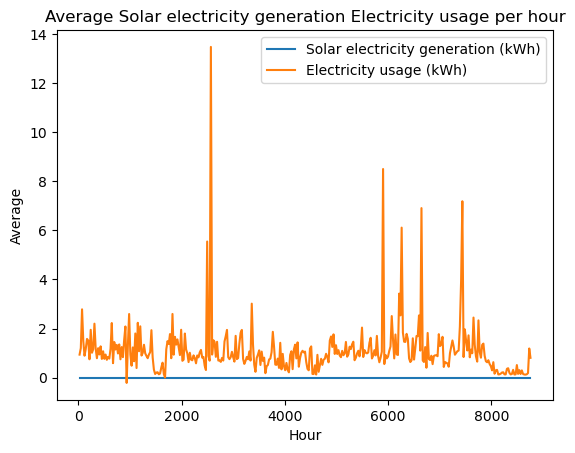

In [16]:
hourly_average.plot(kind='line')
plt.xlabel("Hour")
plt.ylabel("Average") 
plt.title("Average Solar electricity generation Electricity usage per hour") 
plt.show()

In [18]:
daily_average = df.groupby('Hour')[['Solar electricity generation (kWh)', 'Electricity usage (kWh)']].mean()
print(daily_average)

      Solar electricity generation (kWh)  Electricity usage (kWh)
Hour                                                             
0                               0.000000                 0.816471
1                               0.035753                 0.401552
2                               0.000000                 0.250623
3                               0.000000                 0.407688
4                               0.078559                 0.552038
5                               0.270625                 0.610852
6                               0.722868                 2.084071
7                               1.394885                 1.788123
8                               2.206044                 1.798899
9                               2.941512                 1.681553
10                              3.504041                 1.807175
11                              3.751915                 1.685425
12                              3.495879               128.000444
13        

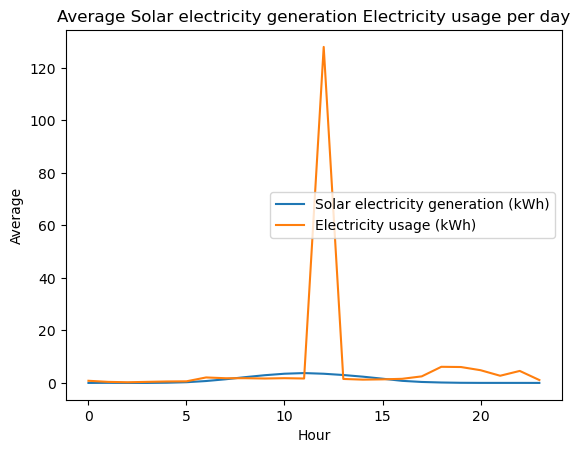

In [19]:
daily_average.plot(kind='line')
plt.xlabel("Hour")
plt.ylabel("Average") 
plt.title("Average Solar electricity generation Electricity usage per day") 
plt.show()

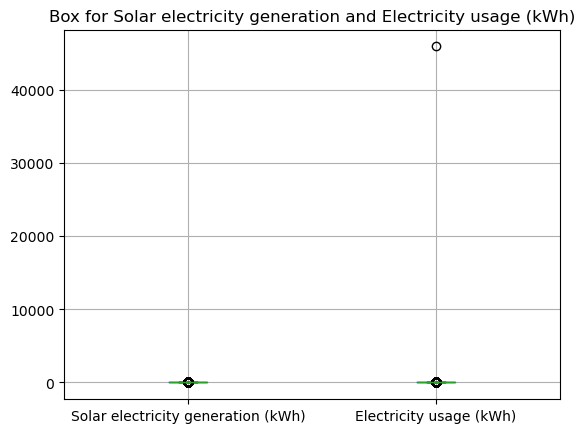

In [20]:
#Investigate outliers 
df.boxplot(column=['Solar electricity generation (kWh)', 'Electricity usage (kWh)'])
plt.title("Box for Solar electricity generation and Electricity usage (kWh)")
plt.show()

In [21]:
def identify_outliers(column): 
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    
    IRQ  = Q3 - Q1 
    
    lower_bound = Q1 - 1.5 * IRQ 
    
    upper_bound = Q3 + 1.5 * IRQ 
    
    return (column < lower_bound) | (column > upper_bound)

In [24]:
#Indentify and remove outliers
outlier_mask = identify_outliers(df['Solar electricity generation (kWh)'])
df  = df[~outlier_mask]

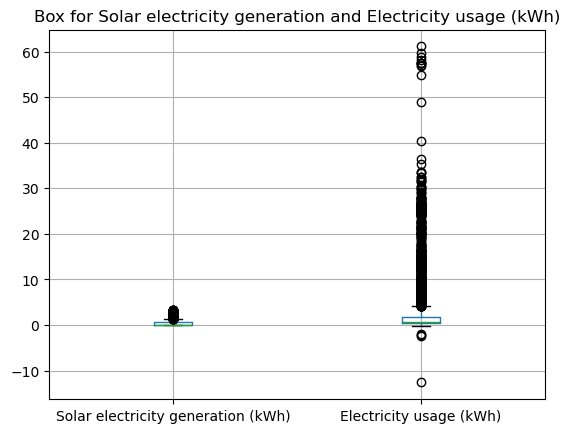

In [26]:
#Investigate outliers 
df.boxplot(column=['Solar electricity generation (kWh)', 'Electricity usage (kWh)'])
plt.title("Box for Solar electricity generation and Electricity usage (kWh)")
plt.show()

In [27]:
#Indentify and remove outliers
outlier_mask = identify_outliers(df['Electricity usage (kWh)'])
df  = df[~outlier_mask]

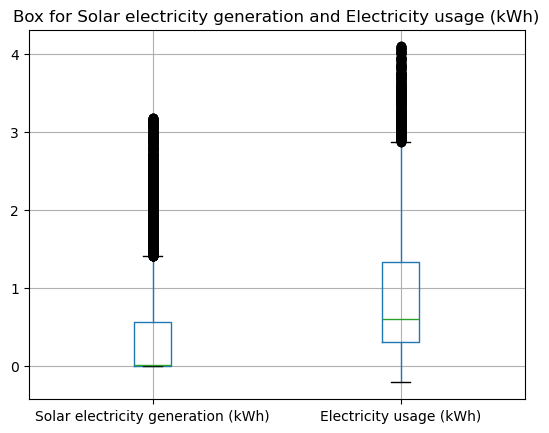

In [29]:
#Investigate outliers 
df.boxplot(column=['Solar electricity generation (kWh)', 'Electricity usage (kWh)'])
plt.title("Box for Solar electricity generation and Electricity usage (kWh)")
plt.show()

In [30]:
hourly_avg_cleaned = df.groupby('Hour')[['Solar electricity generation (kWh)', 'Electricity usage (kWh)']]

C:\Users\LAMECK OMENDA\anaconda\Lib\site-packages\pandas\plotting\_matplotlib\core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


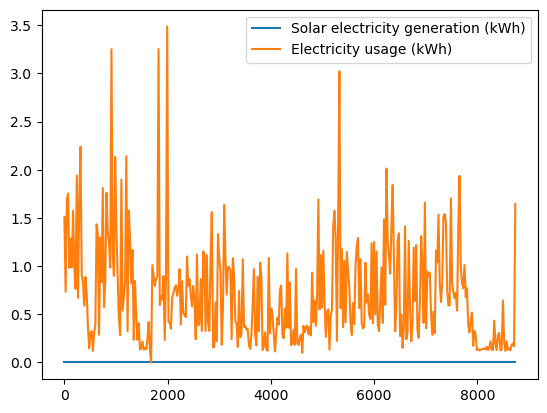

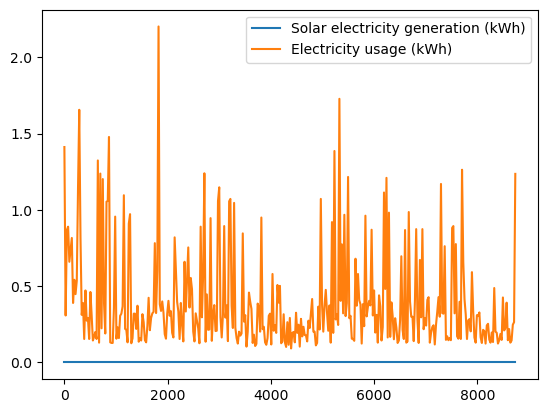

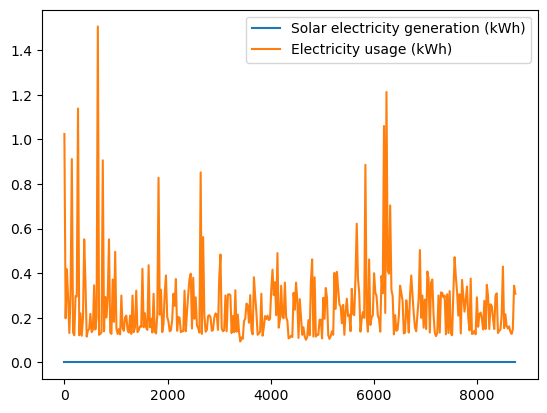

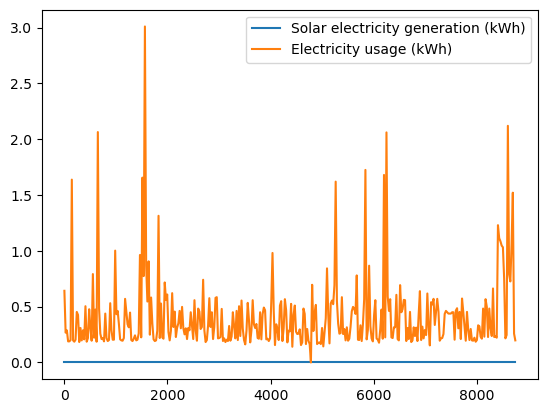

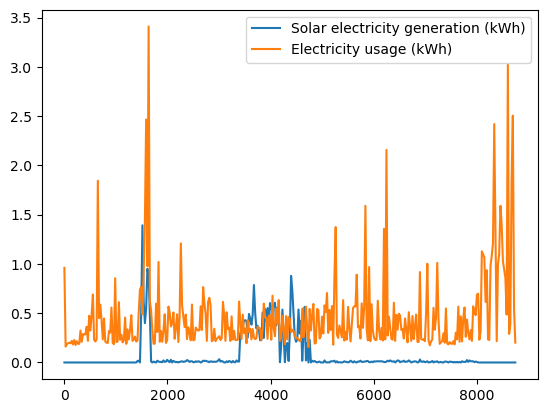

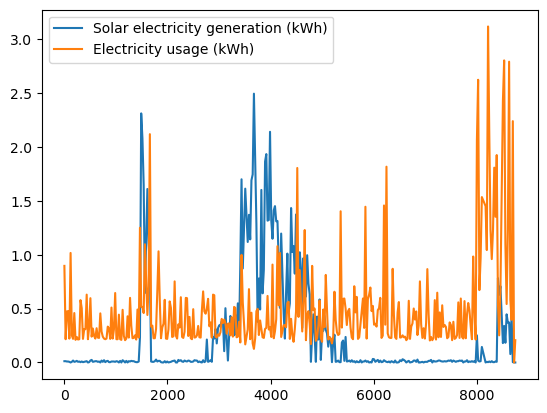

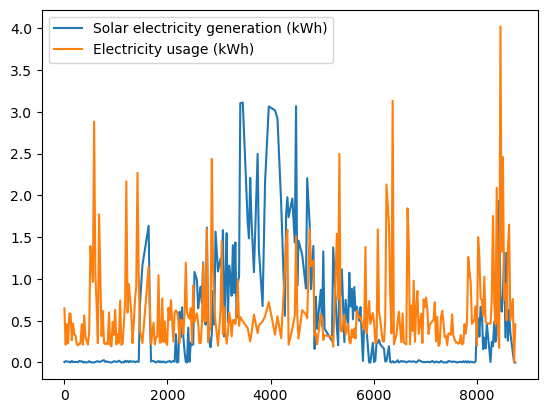

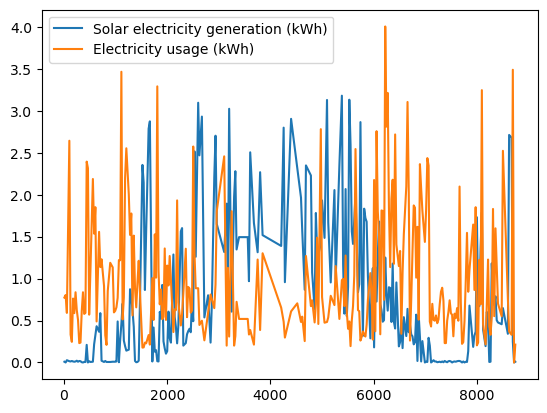

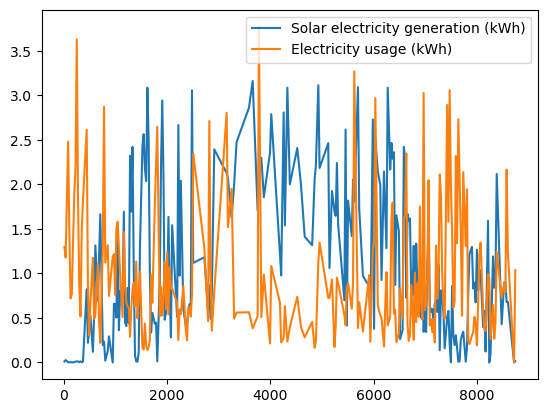

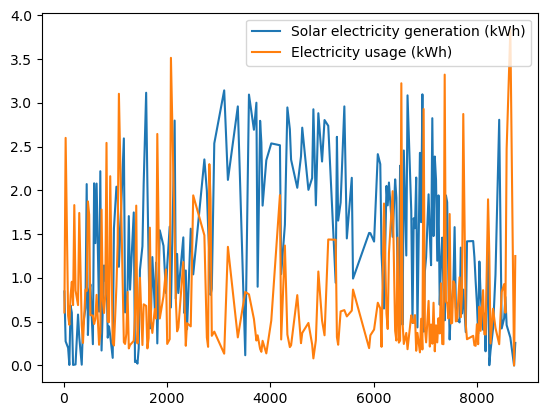

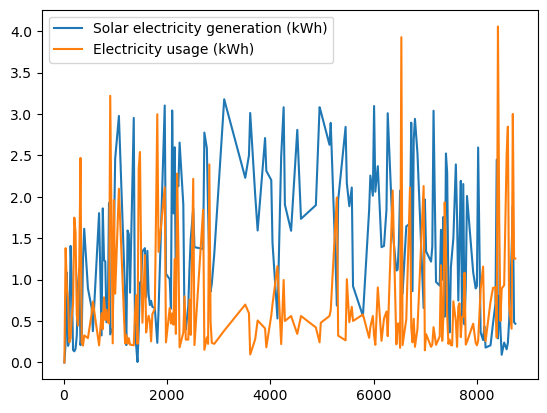

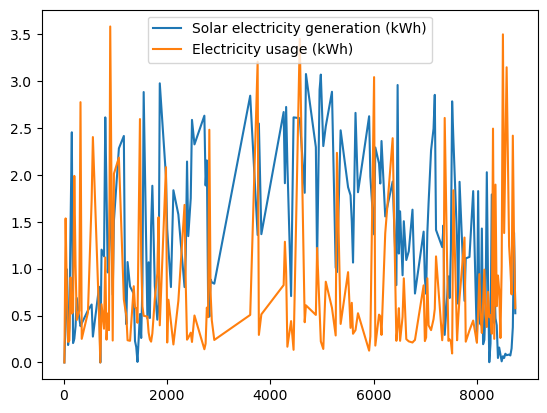

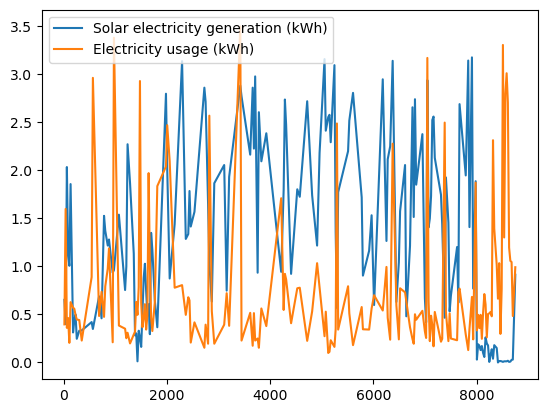

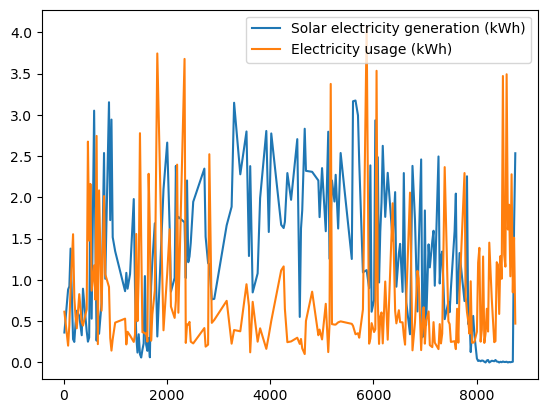

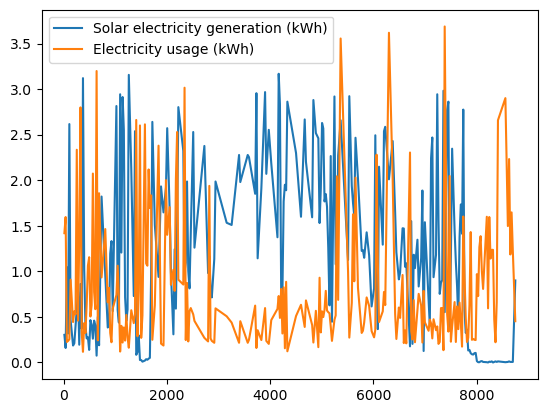

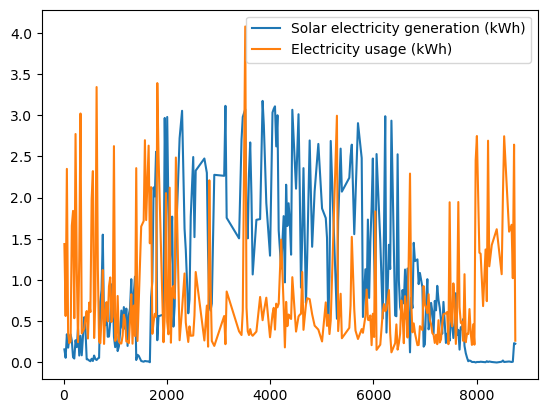

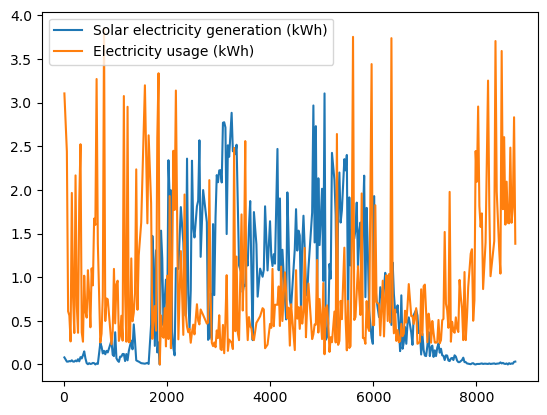

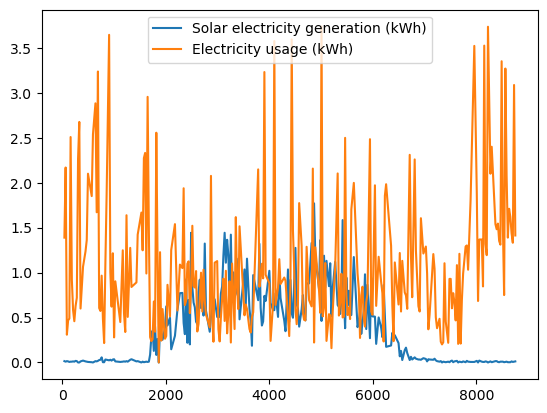

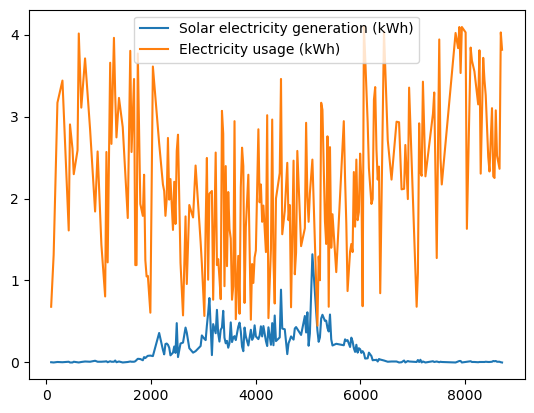

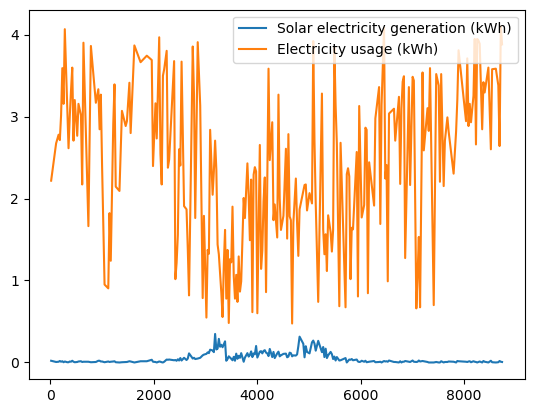

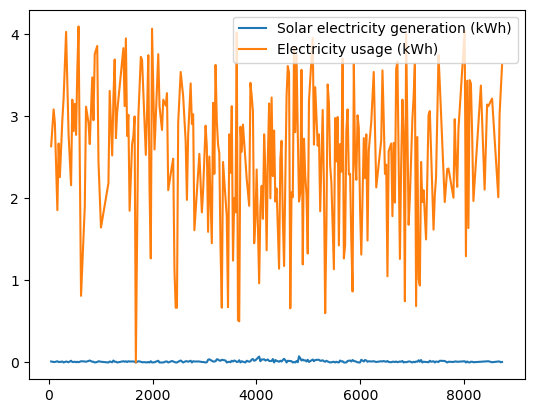

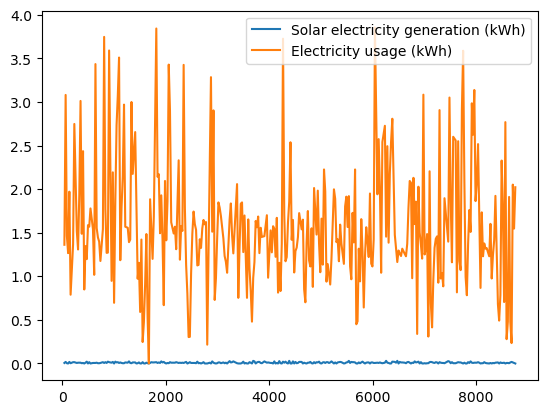

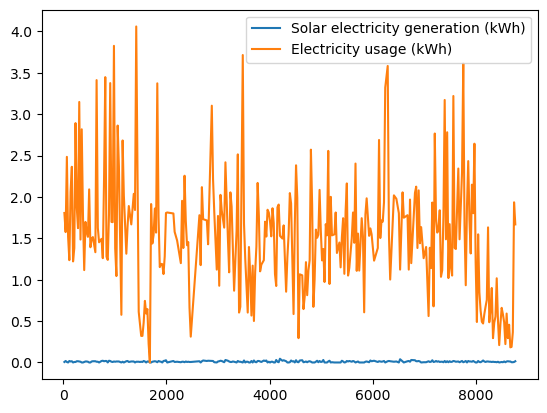

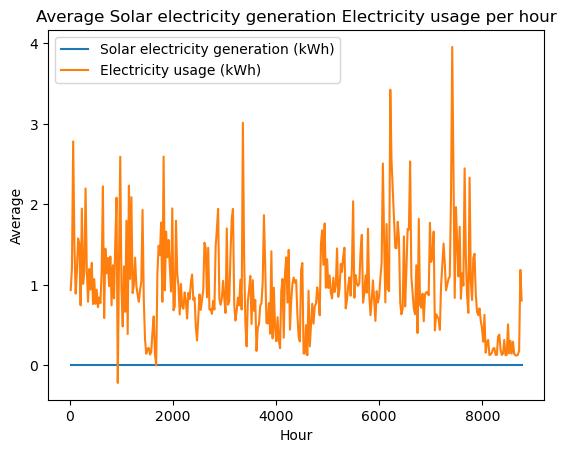

In [32]:
hourly_avg_cleaned.plot(kind='line')
plt.xlabel("Hour")
plt.ylabel("Average") 
plt.title("Average Solar electricity generation Electricity usage per hour") 
plt.show()

In [33]:
daily_average_cleaned = df.groupby('Hour')[['Solar electricity generation (kWh)', 'Electricity usage (kWh)']].mean()
print(daily_average)

      Solar electricity generation (kWh)  Electricity usage (kWh)
Hour                                                             
0                               0.000000                 0.816471
1                               0.035753                 0.401552
2                               0.000000                 0.250623
3                               0.000000                 0.407688
4                               0.078559                 0.552038
5                               0.270625                 0.610852
6                               0.722868                 2.084071
7                               1.394885                 1.788123
8                               2.206044                 1.798899
9                               2.941512                 1.681553
10                              3.504041                 1.807175
11                              3.751915                 1.685425
12                              3.495879               128.000444
13        

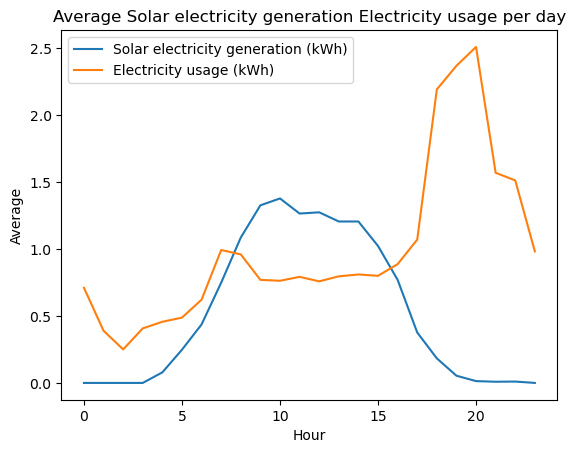

In [34]:
daily_average_cleaned.plot(kind='line')
plt.xlabel("Hour")
plt.ylabel("Average") 
plt.title("Average Solar electricity generation Electricity usage per day") 
plt.show()

## calculate the electricy bought, excess solar generation, battery charge level, saving, projection

In [35]:
df

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
0,0,2020-01-01 00:00:00,0.000,1.509849
1,1,2020-01-01 01:00:00,0.000,1.411859
2,2,2020-01-01 02:00:00,0.000,1.023898
3,3,2020-01-01 03:00:00,0.000,0.642000
4,4,2020-01-01 04:00:00,0.000,0.960000
...,...,...,...,...
8752,16,2020-12-31 16:00:00,0.033,1.383000
8753,17,2020-12-31 17:00:00,0.012,1.413000
8757,21,2020-12-31 21:00:00,0.000,2.022000
8758,22,2020-12-31 22:00:00,0.015,1.668000


In [36]:
# Step (ii): Calculate electricity needed to be bought from the provider
df['Electricity Bought'] = np.maximum(0, df['Electricity usage (kWh)'] - df['Solar electricity generation (kWh)'])

In [37]:
df

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),Electricity Bought
0,0,2020-01-01 00:00:00,0.000,1.509849,1.509849
1,1,2020-01-01 01:00:00,0.000,1.411859,1.411859
2,2,2020-01-01 02:00:00,0.000,1.023898,1.023898
3,3,2020-01-01 03:00:00,0.000,0.642000,0.642000
4,4,2020-01-01 04:00:00,0.000,0.960000,0.960000
...,...,...,...,...,...
8752,16,2020-12-31 16:00:00,0.033,1.383000,1.350000
8753,17,2020-12-31 17:00:00,0.012,1.413000,1.401000
8757,21,2020-12-31 21:00:00,0.000,2.022000,2.022000
8758,22,2020-12-31 22:00:00,0.015,1.668000,1.653000


In [38]:
# Step (iii): Calculate excess solar electricity generated
df['Excess Solar Generation'] = np.maximum(0, df['Solar electricity generation (kWh)'] - df['Electricity usage (kWh)'])

In [39]:
df

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),Electricity Bought,Excess Solar Generation
0,0,2020-01-01 00:00:00,0.000,1.509849,1.509849,0.0
1,1,2020-01-01 01:00:00,0.000,1.411859,1.411859,0.0
2,2,2020-01-01 02:00:00,0.000,1.023898,1.023898,0.0
3,3,2020-01-01 03:00:00,0.000,0.642000,0.642000,0.0
4,4,2020-01-01 04:00:00,0.000,0.960000,0.960000,0.0
...,...,...,...,...,...,...
8752,16,2020-12-31 16:00:00,0.033,1.383000,1.350000,0.0
8753,17,2020-12-31 17:00:00,0.012,1.413000,1.401000,0.0
8757,21,2020-12-31 21:00:00,0.000,2.022000,2.022000,0.0
8758,22,2020-12-31 22:00:00,0.015,1.668000,1.653000,0.0


In [40]:
# Step (iv): Model cumulative battery charge level
max_battery_capacity = 12.5  # kWh
df['Battery Charge Level'] = 0
for index, row in df.iterrows():
    excess_generation = row['Excess Solar Generation']
    battery_charge = min(max_battery_capacity - row['Battery Charge Level'], excess_generation)
    df.at[index, 'Battery Charge Level'] = row['Battery Charge Level'] + battery_charge

C:\Users\LAMECK OMENDA\AppData\Local\Temp\ipykernel_7520\2442522345.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.23999999999999977' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[index, 'Battery Charge Level'] = row['Battery Charge Level'] + battery_charge


In [41]:
df

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),Electricity Bought,Excess Solar Generation,Battery Charge Level
0,0,2020-01-01 00:00:00,0.000,1.509849,1.509849,0.0,0.0
1,1,2020-01-01 01:00:00,0.000,1.411859,1.411859,0.0,0.0
2,2,2020-01-01 02:00:00,0.000,1.023898,1.023898,0.0,0.0
3,3,2020-01-01 03:00:00,0.000,0.642000,0.642000,0.0,0.0
4,4,2020-01-01 04:00:00,0.000,0.960000,0.960000,0.0,0.0
...,...,...,...,...,...,...,...
8752,16,2020-12-31 16:00:00,0.033,1.383000,1.350000,0.0,0.0
8753,17,2020-12-31 17:00:00,0.012,1.413000,1.401000,0.0,0.0
8757,21,2020-12-31 21:00:00,0.000,2.022000,2.022000,0.0,0.0
8758,22,2020-12-31 22:00:00,0.015,1.668000,1.653000,0.0,0.0


In [42]:
# Step (v): Calculate electricity bought with a battery
df['Electricity Bought with Battery'] = df['Electricity Bought'] - df['Excess Solar Generation']

In [43]:
df

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),Electricity Bought,Excess Solar Generation,Battery Charge Level,Electricity Bought with Battery
0,0,2020-01-01 00:00:00,0.000,1.509849,1.509849,0.0,0.0,1.509849
1,1,2020-01-01 01:00:00,0.000,1.411859,1.411859,0.0,0.0,1.411859
2,2,2020-01-01 02:00:00,0.000,1.023898,1.023898,0.0,0.0,1.023898
3,3,2020-01-01 03:00:00,0.000,0.642000,0.642000,0.0,0.0,0.642000
4,4,2020-01-01 04:00:00,0.000,0.960000,0.960000,0.0,0.0,0.960000
...,...,...,...,...,...,...,...,...
8752,16,2020-12-31 16:00:00,0.033,1.383000,1.350000,0.0,0.0,1.350000
8753,17,2020-12-31 17:00:00,0.012,1.413000,1.401000,0.0,0.0,1.401000
8757,21,2020-12-31 21:00:00,0.000,2.022000,2.022000,0.0,0.0,2.022000
8758,22,2020-12-31 22:00:00,0.015,1.668000,1.653000,0.0,0.0,1.653000


In [44]:
# Step (vi): Calculate savings from installing a battery
electricity_price = 0.17  # $/kWh
df['Savings ($)'] = df['Electricity Bought'] * electricity_price - df['Electricity Bought with Battery'] * electricity_price

In [45]:
df

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),Electricity Bought,Excess Solar Generation,Battery Charge Level,Electricity Bought with Battery,Savings ($)
0,0,2020-01-01 00:00:00,0.000,1.509849,1.509849,0.0,0.0,1.509849,0.0
1,1,2020-01-01 01:00:00,0.000,1.411859,1.411859,0.0,0.0,1.411859,0.0
2,2,2020-01-01 02:00:00,0.000,1.023898,1.023898,0.0,0.0,1.023898,0.0
3,3,2020-01-01 03:00:00,0.000,0.642000,0.642000,0.0,0.0,0.642000,0.0
4,4,2020-01-01 04:00:00,0.000,0.960000,0.960000,0.0,0.0,0.960000,0.0
...,...,...,...,...,...,...,...,...,...
8752,16,2020-12-31 16:00:00,0.033,1.383000,1.350000,0.0,0.0,1.350000,0.0
8753,17,2020-12-31 17:00:00,0.012,1.413000,1.401000,0.0,0.0,1.401000,0.0
8757,21,2020-12-31 21:00:00,0.000,2.022000,2.022000,0.0,0.0,2.022000,0.0
8758,22,2020-12-31 22:00:00,0.015,1.668000,1.653000,0.0,0.0,1.653000,0.0


In [46]:
# Step (vii): Data Aggregation and Visualization
df['Month'] = df['Date/hour start'].dt.month
monthly_data = df.groupby('Month').agg({
    'Solar electricity generation (kWh)': 'sum',
    'Electricity usage (kWh)': 'sum',
    'Electricity Bought': 'sum',
    'Electricity Bought with Battery': 'sum'
}).reset_index()

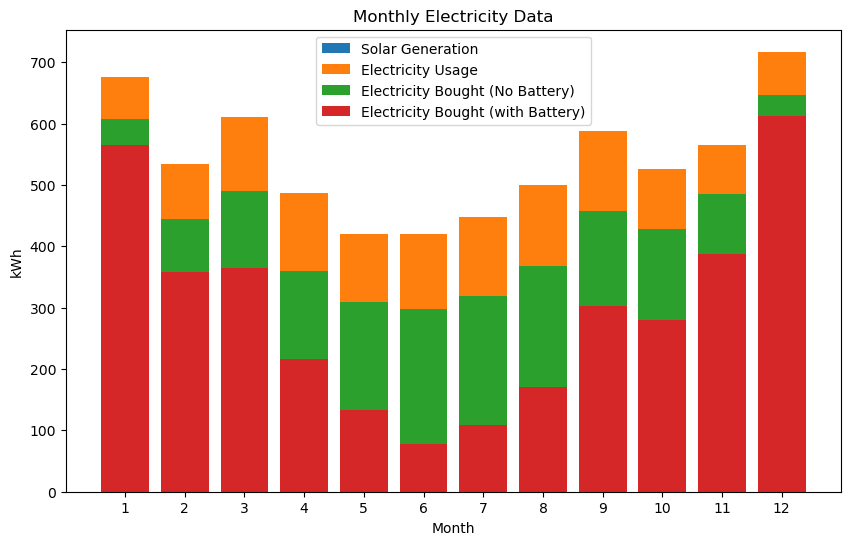

In [47]:
# Create a bar plot for monthly values
plt.figure(figsize=(10, 6))
plt.bar(monthly_data['Month'], monthly_data['Solar electricity generation (kWh)'], label='Solar Generation')
plt.bar(monthly_data['Month'], monthly_data['Electricity usage (kWh)'], label='Electricity Usage')
plt.bar(monthly_data['Month'], monthly_data['Electricity Bought'], label='Electricity Bought (No Battery)')
plt.bar(monthly_data['Month'], monthly_data['Electricity Bought with Battery'], label='Electricity Bought (with Battery)')
plt.xlabel('Month')
plt.ylabel('kWh')
plt.title('Monthly Electricity Data')
plt.legend()
plt.xticks(range(1, 13))
plt.show()